In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

<AxesSubplot:>

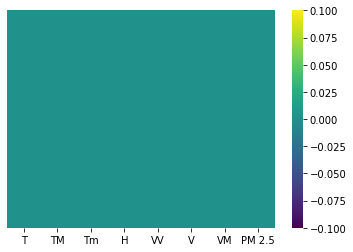

In [6]:
df=pd.read_csv('Data/Real-Data/Real_Combine.csv')
df=df.dropna()
val_null = df.isnull()
sns.heatmap(val_null, yticklabels = False, cbar = True, cmap = 'viridis')

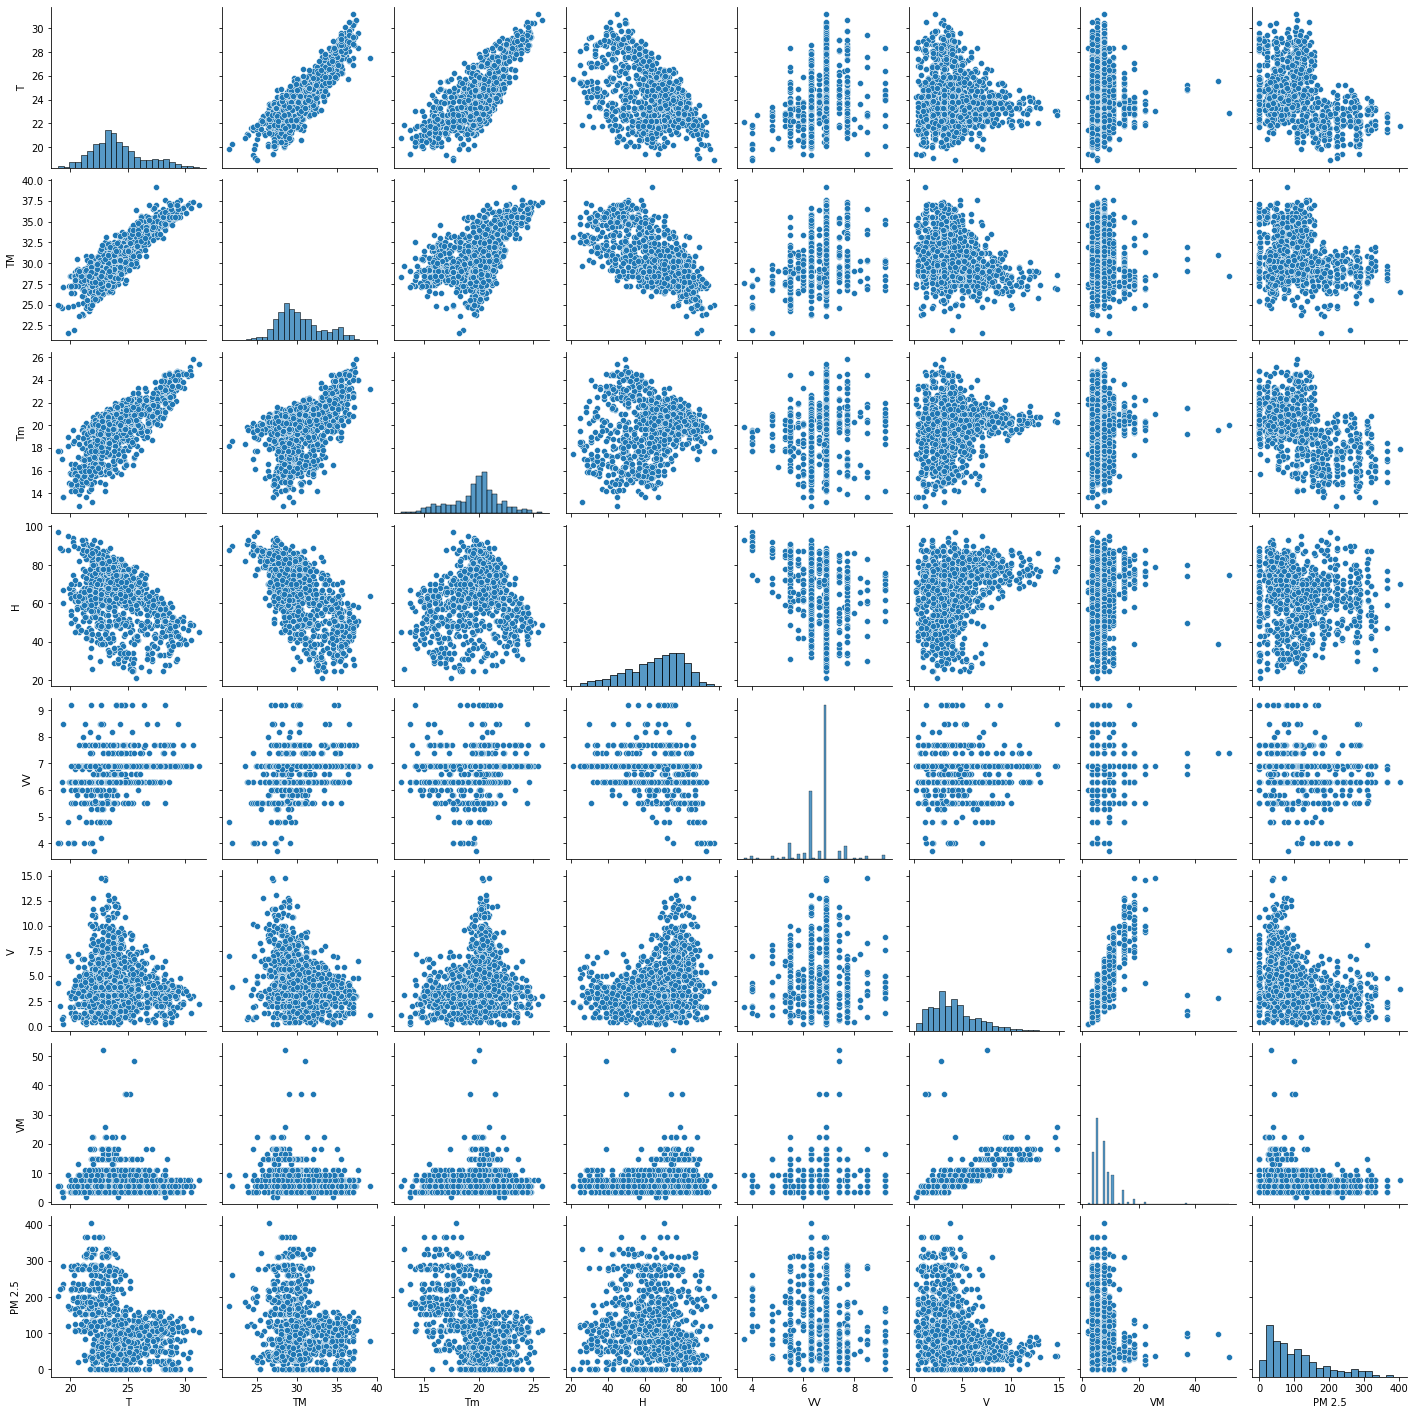

In [7]:
sns.pairplot(df)

In [8]:
corr = df.corr()
corr

T        TM        Tm         H        VV         V        VM  \
T       1.000000  0.869258  0.753944 -0.455387  0.325016 -0.112894 -0.066897   
TM      0.869258  1.000000  0.478298 -0.636506  0.287989 -0.290409 -0.201408   
Tm      0.753944  0.478298  1.000000  0.156138  0.138933  0.163599  0.141125   
H      -0.455387 -0.636506  0.156138  1.000000 -0.274199  0.354845  0.262063   
VV      0.325016  0.287989  0.138933 -0.274199  1.000000  0.051324  0.042967   
V      -0.112894 -0.290409  0.163599  0.354845  0.051324  1.000000  0.710970   
VM     -0.066897 -0.201408  0.141125  0.262063  0.042967  0.710970  1.000000   
PM 2.5 -0.362911 -0.166377 -0.519239 -0.176081 -0.141773 -0.366794 -0.285970   

          PM 2.5  
T      -0.362911  
TM     -0.166377  
Tm     -0.519239  
H      -0.176081  
VV     -0.141773  
V      -0.366794  
VM     -0.285970  
PM 2.5  1.000000

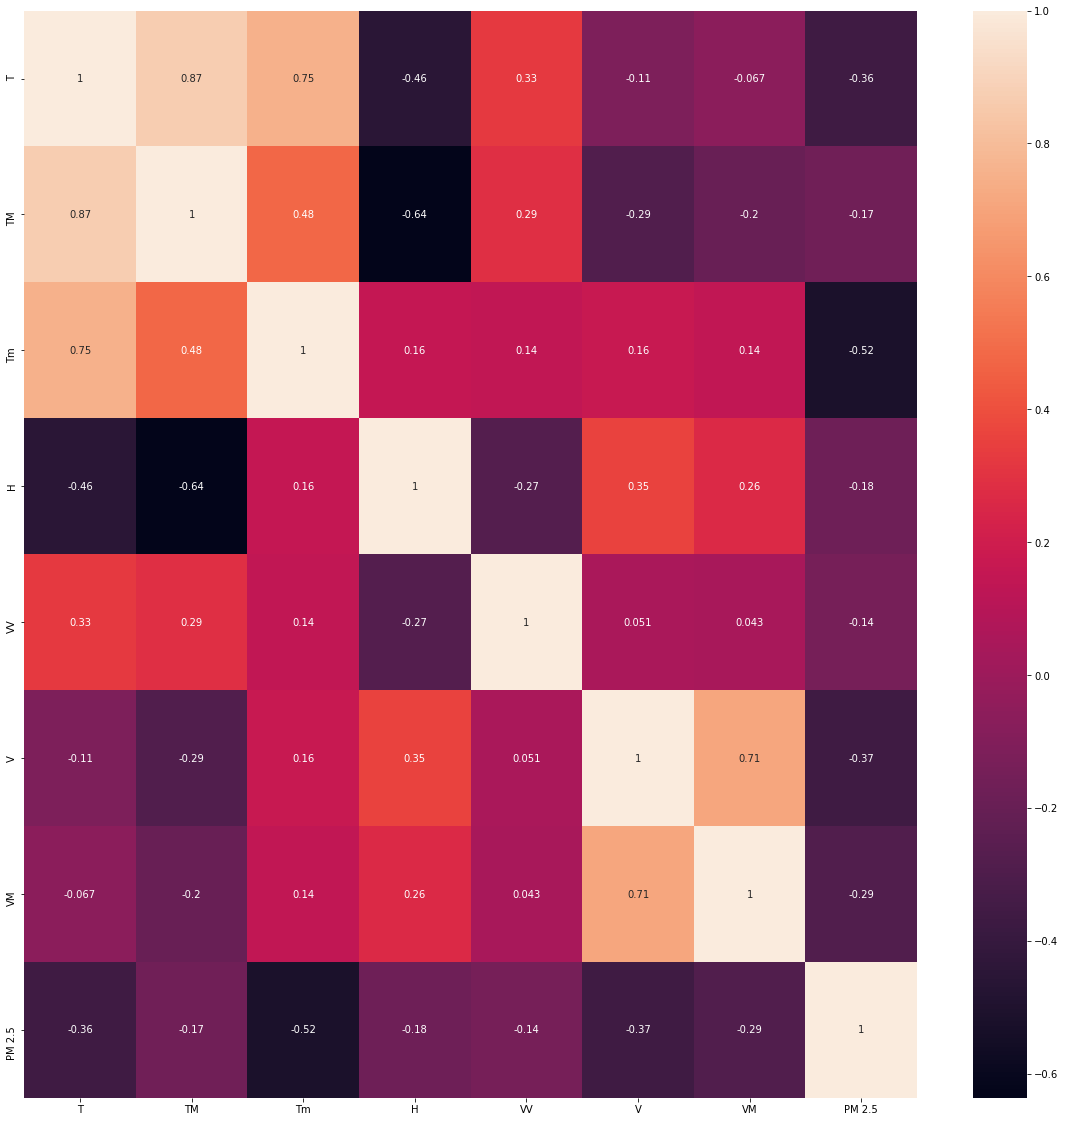

In [10]:
top_features = corr.index
plt.figure(figsize = (20,20))
heamap = sns.heatmap(df[top_features].corr(), annot = True)

In [11]:
# Seperate dependent and independent variables

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [14]:
# Feature Importance

from sklearn.ensemble import ExtraTreesRegressor
tree = ExtraTreesRegressor()
tree.fit(X,y)

ExtraTreesRegressor()

In [15]:
print(tree.feature_importances_)

[0.18724424 0.10581935 0.3186488  0.11967003 0.05768596 0.14011384
 0.07081779]


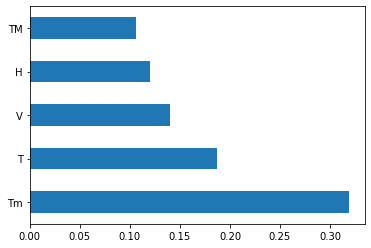

In [16]:
feature_importance = pd.Series(tree.feature_importances_, index = X.columns)
feature_importance.nlargest(5).plot(kind = 'barh')
plt.show()

C:\Users\USER\.conda\envs\virtualenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

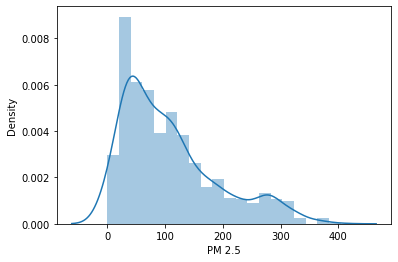

In [17]:
sns.distplot(y)

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=0)

#### Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [20]:
regressor = model.fit(X_train,y_train)

In [21]:
r2_score_train = regressor.score(X_train,y_train)
r2_score_train

0.37493872882105606

In [22]:
r2_score_test = regressor.score(X_test,y_test)
r2_score_test

0.36042374065170435

In [23]:
from sklearn.model_selection import cross_val_score
cv = cross_val_score(regressor, X,y,cv=5)
cv.mean()# to get one iteration value

0.3419726281161329

In [24]:
regressor.coef_#slope

array([-16.88538476,   1.87739133,  -4.94843943,  -1.17297403,
        -5.52141421,  -9.21705997,  -0.63411322])

In [25]:
regressor.intercept_# independent features are 0 y will be having this value

712.4460738601399

In [26]:
pred = regressor.predict(X_test)

C:\Users\USER\.conda\envs\virtualenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

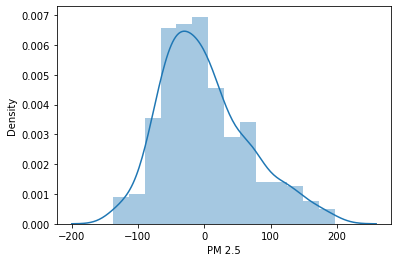

In [27]:
sns.distplot(y_test-pred)

C:\Users\USER\.conda\envs\virtualenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PM 2.5'>

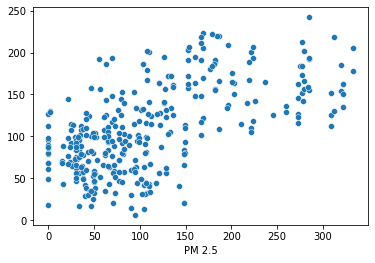

In [28]:
sns.scatterplot(y_test,pred)

In [29]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
import numpy as np

In [30]:
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print(mae)
print(mse)
print(rmse)

52.38622435873509
4376.490176988561
66.15504649676063


#### Ridge Regression

In [31]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [32]:
ridge = Ridge()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-5,1e-3,1e-1,1,5,10,20]}
ridge_regressor = GridSearchCV(ridge, parameters,cv=5,scoring = 'neg_mean_squared_error')

In [33]:
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.001, 0.1, 1, 5,
                                   10, 20]},
             scoring='neg_mean_squared_error')

In [34]:
print(ridge_regressor.best_params_)

{'alpha': 20}


In [35]:
print(ridge_regressor.best_score_)

-4410.714517838578


#### Lasso Regression

In [36]:
from sklearn.linear_model import Lasso
lasso = Lasso()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-5,1e-3,1e-1,1,5,10,20]}
lasso_regressor = GridSearchCV(lasso, parameters, cv=5, scoring = 'neg_mean_squared_error')

In [37]:
lasso_regressor.fit(X_train,y_train)

C:\Users\USER\.conda\envs\virtualenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1212030.7057519136, tolerance: 424.40363855562407
  model = cd_fast.enet_coordinate_descent(
C:\Users\USER\.conda\envs\virtualenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1240181.2887808888, tolerance: 423.9509652361103
  model = cd_fast.enet_coordinate_descent(
C:\Users\USER\.conda\envs\virtualenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1239089.6718098556, tolerance: 432.57276297805834
  model = cd_fast.enet_coordinate_descent(
C:\Users\USER\.conda\envs\virtualenv\lib\site-packages\sklearn\linea

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.001, 0.1, 1, 5,
                                   10, 20]},
             scoring='neg_mean_squared_error')

In [38]:
print(lasso_regressor.best_params_)

{'alpha': 0.001}


In [39]:
print(lasso_regressor.best_score_)

-4411.465425788611


In [40]:
lasso_pred = lasso_regressor.predict(X_test)

C:\Users\USER\.conda\envs\virtualenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

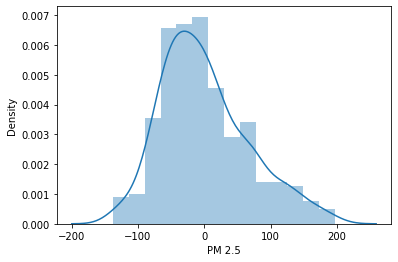

In [41]:
sns.distplot(y_test-lasso_pred)

C:\Users\USER\.conda\envs\virtualenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PM 2.5'>

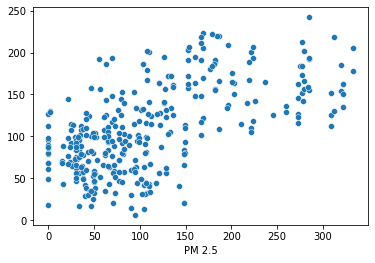

In [42]:
sns.scatterplot(y_test,lasso_pred)

In [43]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
import numpy as np

In [44]:
mae = mean_absolute_error(y_test, lasso_pred)
mse = mean_squared_error(y_test, lasso_pred)
rmse = np.sqrt(mse)
print(mae)
print(mse)
print(rmse)

52.386172645119714
4376.489285387816
66.15503975803972


#### Decision Tree Regression

In [45]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(criterion='mse')

In [46]:
dtree.fit(X_train,y_train)

DecisionTreeRegressor()

In [47]:
dtree_pred = dtree.predict(X_test)

In [48]:
dtree_r2_score_train = dtree.score(X_train,y_train)
dtree_r2_score_train

1.0

In [49]:
dtree_r2_score_test = dtree.score(X_test,y_test)
dtree_r2_score_test

0.006703411907038492

In [50]:
dtree_cv = cross_val_score(dtree,X,y,cv=5)

In [51]:
dtree_cv.mean()

-0.0862002163442945

#### Tree Visualization

In [56]:
import six
import sys
import io
from io import StringIO
from IPython.display import Image  
sys.modules['sklearn.externals.six'] = six 
from sklearn.tree import export_graphviz
import pydotplus

In [53]:
features = list(X.columns)
features

['T', 'TM', 'Tm', 'H', 'VV', 'V', 'VM']

In [54]:
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

In [57]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.870976 to fit



In [58]:
dtree_pred=dtree.predict(X_test)

<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

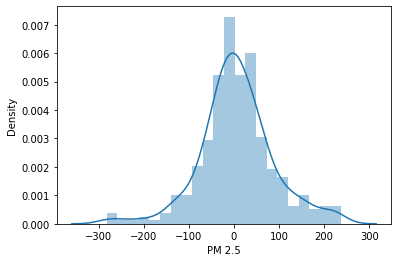

In [61]:
sns.distplot(y_test-dtree_pred)

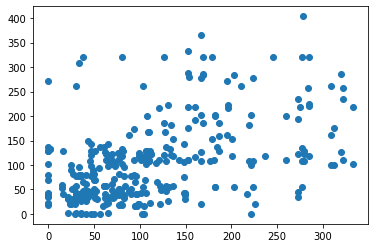

In [62]:
plt.scatter(y_test,dtree_pred)

In [63]:
# Hyperparameter Tuning

params={
 "splitter"    : ["best","random"] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_samples_leaf" : [ 1,2,3,4,5 ],
"min_weight_fraction_leaf":[0.1,0.2,0.3,0.4],
 "max_features" : ["auto","log2","sqrt",None ],
    "max_leaf_nodes":[None,10,20,30,40,50,60,70]
}

In [69]:
dtree_grid_search=GridSearchCV(dtree,param_grid=params,scoring='neg_mean_squared_error',n_jobs=-1,cv=10,verbose=3)

In [70]:
dtree_grid_search.fit(X,y)

Fitting 10 folds for each of 10240 candidates, totalling 102400 fits


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 8, 10, 12, 15],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_weight_fraction_leaf': [0.1, 0.2, 0.3, 0.4],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=3)

In [72]:
dtree_gs_pred = dtree_grid_search.predict(X_test)

In [73]:
dtree_grid_search.best_params_

{'max_depth': 3,
 'max_features': 'log2',
 'max_leaf_nodes': None,
 'min_samples_leaf': 2,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [74]:
dtree_grid_search.best_score_

-4205.974696123054

C:\Users\USER\.conda\envs\virtualenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

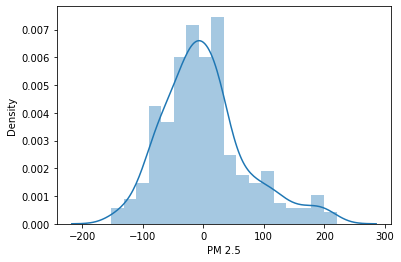

In [75]:
sns.distplot(y_test-dtree_gs_pred)

In [78]:
print('MAE:', mean_absolute_error(y_test, dtree_gs_pred))
print('MSE:', mean_squared_error(y_test, dtree_gs_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, dtree_gs_pred)))

MAE: 52.347863352460514
MSE: 4840.8856874490175
RMSE: 69.5764736635094


#### Random Forest Regressor

In [88]:
from sklearn.ensemble import RandomForestRegressor

In [89]:
rf_regressor = RandomForestRegressor()

In [90]:
rf_regressor.fit(X_train,y_train)

RandomForestRegressor()

In [91]:
rf_pred = rf_regressor.predict(X_test)

In [92]:
rf_regressor.score(X_train,y_train)

0.9240207552386737

In [93]:
rf_regressor.score(X_test,y_test)

0.44447714405101957

C:\Users\USER\.conda\envs\virtualenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

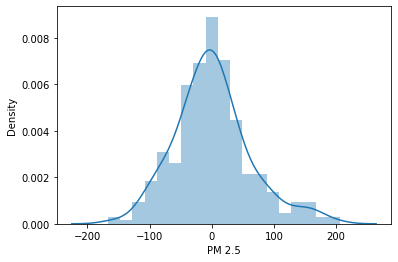

In [94]:
sns.distplot(y_test-rf_pred)

C:\Users\USER\.conda\envs\virtualenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PM 2.5'>

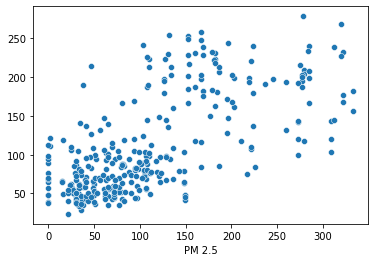

In [95]:
sns.scatterplot(y_test,rf_pred)

In [96]:
# Hyperparameter tuning

from sklearn.model_selection import RandomizedSearchCV

In [97]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 5, stop = 30, num = 12)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]

In [101]:
random_grid = {'n_estimators' : n_estimators,
               'max_features' : max_features,
               'max_depth' : max_depth,
               'min_samples_split' : min_samples_split,
               'min_samples_leaf' : min_samples_leaf
              }

In [103]:
rf_rand_search_cv = RandomizedSearchCV(rf_regressor, random_grid, scoring = 'neg_mean_squared_error', n_iter = 10, cv = 5,
                                      verbose = 2, random_state = 0)

In [105]:
rf_rand_search_cv.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=900; total time=   3.0s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=900; total time=   2.9s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=900; total time=   2.9s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=900; total time=   2.4s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=900; total time=   3.2s
[CV] END max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=400; total time=   1.4s
[CV] END max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=400; total time=   1.5s
[CV] END max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_est

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 7, 9, 11, 14, 16, 18,
                                                      20, 23, 25, 27, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=0, scoring='neg_mean_squared_error', verbose=2)

In [106]:
rf_rand_search_cv.best_params_

{'n_estimators': 100,
 'min_samples_split': 10,
 'min_samples_leaf': 5,
 'max_features': 'sqrt',
 'max_depth': 18}

In [107]:
rf_rand_search_cv.best_score_

-3505.4354320196276

In [108]:
rscv_pred = rf_rand_search_cv.predict(X_test)

C:\Users\USER\.conda\envs\virtualenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

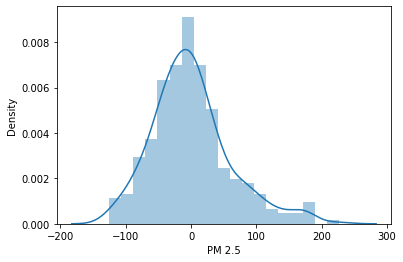

In [109]:
sns.distplot(y_test-rscv_pred)

C:\Users\USER\.conda\envs\virtualenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PM 2.5'>

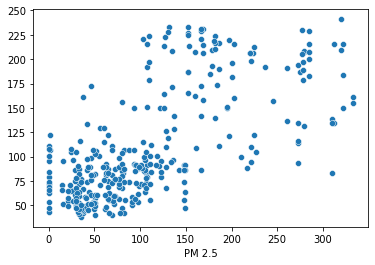

In [111]:
sns.scatterplot(y_test,rscv_pred)

In [112]:
print('MAE:', mean_absolute_error(y_test, rscv_pred))
print('MSE:', mean_squared_error(y_test, rscv_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, rscv_pred)))

MAE: 45.301750898616895
MSE: 3660.7989494487856
RMSE: 60.50453660221509


#### Xgboost Regressor

In [115]:
import xgboost as xgb

In [116]:
xg_regressor = xgb.XGBRegressor()

In [117]:
xg_regressor.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [118]:
xg_pred = xg_regressor.predict(X_test)

C:\Users\USER\.conda\envs\virtualenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

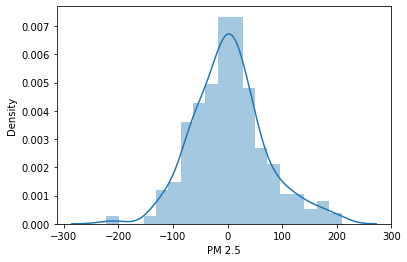

In [119]:
sns.distplot(y_test-xg_pred)

C:\Users\USER\.conda\envs\virtualenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PM 2.5'>

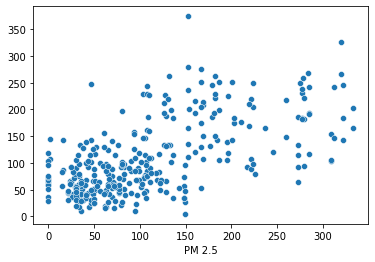

In [120]:
sns.scatterplot(y_test,xg_pred)

In [121]:
xg_regressor.score(X_train,y_train)

0.9970669965623851

In [122]:
xg_regressor.score(X_test,y_test)

0.33428733216688444

In [124]:
xg_cv_score = cross_val_score(xg_regressor,X,y,cv =5)

In [125]:
xg_cv_score.mean()

0.27214384963826876

In [128]:
# Hyperparameter Tuning

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
learning_rate = ['0.05', '0.1', '0.2', '0.3', '0.5']
max_depth = [int(x) for x in np.linspace(start = 5, stop = 30, num = 12)]
subsample = [0.6,0.7,0.8]
min_child_Weight = [3,4,5,6,7]

In [129]:
random_grid = {'n_estimators' : n_estimators,
               'learning_rate' : learning_rate,
               'max_depth' : max_depth,
               'subsample' : subsample,
               'min_child_Weight' : min_child_Weight
              }

In [135]:
xg_Random = RandomizedSearchCV(xg_regressor,random_grid,scoring = 'neg_mean_squared_error', cv = 5, n_iter = 50, verbose = 2, 
                               random_state = 0)

In [136]:
xg_Random.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[18:11:11] WARNING: ..\src\learner.cc:541: 
Parameters: { min_child_Weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV] END learning_rate=0.1, max_depth=11, min_child_Weight=3, n_estimators=1100, subsample=0.8; total time=   3.3s
[18:11:14] WARNING: ..\src\learner.cc:541: 
Parameters: { min_child_Weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV] END learning_rate=0.1, max_depth=11, min_child_Weight=3, n_estimators=1100, subsample=0.8; total time=   2.5s
[18:11:17] WARNING: ..\src\learner.c

[CV] END learning_rate=0.1, max_depth=18, min_child_Weight=3, n_estimators=900, subsample=0.6; total time=   2.9s
[18:11:50] WARNING: ..\src\learner.cc:541: 
Parameters: { min_child_Weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV] END learning_rate=0.1, max_depth=18, min_child_Weight=3, n_estimators=900, subsample=0.6; total time=   3.5s
[18:11:54] WARNING: ..\src\learner.cc:541: 
Parameters: { min_child_Weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV] END learning_rate=0.2, max_depth=9, min_child_Weight=7, n_estimators=1200, subsample=0.8; total

[CV] END learning_rate=0.2, max_depth=5, min_child_Weight=4, n_estimators=600, subsample=0.8; total time=   0.6s
[18:12:09] WARNING: ..\src\learner.cc:541: 
Parameters: { min_child_Weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV] END learning_rate=0.2, max_depth=5, min_child_Weight=4, n_estimators=600, subsample=0.8; total time=   0.6s
[18:12:10] WARNING: ..\src\learner.cc:541: 
Parameters: { min_child_Weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV] END learning_rate=0.2, max_depth=5, min_child_Weight=4, n_estimators=600, subsample=0.8; total ti

[CV] END learning_rate=0.05, max_depth=11, min_child_Weight=7, n_estimators=800, subsample=0.6; total time=   2.4s
[18:12:32] WARNING: ..\src\learner.cc:541: 
Parameters: { min_child_Weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV] END learning_rate=0.05, max_depth=11, min_child_Weight=7, n_estimators=800, subsample=0.6; total time=   2.3s
[18:12:35] WARNING: ..\src\learner.cc:541: 
Parameters: { min_child_Weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV] END learning_rate=0.05, max_depth=11, min_child_Weight=7, n_estimators=800, subsample=0.6; to

[CV] END learning_rate=0.3, max_depth=20, min_child_Weight=3, n_estimators=1000, subsample=0.7; total time=   0.8s
[18:12:54] WARNING: ..\src\learner.cc:541: 
Parameters: { min_child_Weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV] END learning_rate=0.3, max_depth=20, min_child_Weight=3, n_estimators=1000, subsample=0.7; total time=   0.8s
[18:12:55] WARNING: ..\src\learner.cc:541: 
Parameters: { min_child_Weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV] END learning_rate=0.3, max_depth=20, min_child_Weight=3, n_estimators=1000, subsample=0.7; to

[CV] END learning_rate=0.05, max_depth=9, min_child_Weight=7, n_estimators=1200, subsample=0.6; total time=   2.9s
[18:13:23] WARNING: ..\src\learner.cc:541: 
Parameters: { min_child_Weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV] END learning_rate=0.2, max_depth=27, min_child_Weight=5, n_estimators=900, subsample=0.6; total time=   1.4s
[18:13:25] WARNING: ..\src\learner.cc:541: 
Parameters: { min_child_Weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV] END learning_rate=0.2, max_depth=27, min_child_Weight=5, n_estimators=900, subsample=0.6; tota

[CV] END learning_rate=0.1, max_depth=5, min_child_Weight=3, n_estimators=200, subsample=0.6; total time=   0.2s
[18:13:42] WARNING: ..\src\learner.cc:541: 
Parameters: { min_child_Weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV] END learning_rate=0.1, max_depth=5, min_child_Weight=3, n_estimators=200, subsample=0.6; total time=   0.2s
[18:13:42] WARNING: ..\src\learner.cc:541: 
Parameters: { min_child_Weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV] END learning_rate=0.2, max_depth=14, min_child_Weight=3, n_estimators=1100, subsample=0.8; total 

[CV] END learning_rate=0.05, max_depth=30, min_child_Weight=4, n_estimators=1100, subsample=0.6; total time=   4.0s
[18:14:10] WARNING: ..\src\learner.cc:541: 
Parameters: { min_child_Weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV] END learning_rate=0.05, max_depth=30, min_child_Weight=4, n_estimators=1100, subsample=0.6; total time=   4.1s
[18:14:14] WARNING: ..\src\learner.cc:541: 
Parameters: { min_child_Weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV] END learning_rate=0.05, max_depth=30, min_child_Weight=4, n_estimators=1100, subsample=0.6;

[CV] END learning_rate=0.3, max_depth=27, min_child_Weight=3, n_estimators=400, subsample=0.8; total time=   0.5s
[18:14:43] WARNING: ..\src\learner.cc:541: 
Parameters: { min_child_Weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV] END learning_rate=0.3, max_depth=27, min_child_Weight=3, n_estimators=400, subsample=0.8; total time=   0.5s
[18:14:43] WARNING: ..\src\learner.cc:541: 
Parameters: { min_child_Weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV] END learning_rate=0.3, max_depth=27, min_child_Weight=3, n_estimators=400, subsample=0.8; total

[CV] END learning_rate=0.05, max_depth=11, min_child_Weight=6, n_estimators=400, subsample=0.8; total time=   1.4s
[18:15:06] WARNING: ..\src\learner.cc:541: 
Parameters: { min_child_Weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV] END learning_rate=0.05, max_depth=11, min_child_Weight=6, n_estimators=400, subsample=0.8; total time=   1.2s
[18:15:08] WARNING: ..\src\learner.cc:541: 
Parameters: { min_child_Weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV] END learning_rate=0.05, max_depth=11, min_child_Weight=6, n_estimators=400, subsample=0.8; to

[CV] END learning_rate=0.3, max_depth=16, min_child_Weight=5, n_estimators=200, subsample=0.7; total time=   0.4s
[18:15:25] WARNING: ..\src\learner.cc:541: 
Parameters: { min_child_Weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV] END learning_rate=0.1, max_depth=18, min_child_Weight=5, n_estimators=900, subsample=0.7; total time=   1.5s
[18:15:27] WARNING: ..\src\learner.cc:541: 
Parameters: { min_child_Weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV] END learning_rate=0.1, max_depth=18, min_child_Weight=5, n_estimators=900, subsample=0.7; total

[CV] END learning_rate=0.5, max_depth=5, min_child_Weight=5, n_estimators=900, subsample=0.6; total time=   0.6s
[18:15:46] WARNING: ..\src\learner.cc:541: 
Parameters: { min_child_Weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV] END learning_rate=0.5, max_depth=5, min_child_Weight=5, n_estimators=900, subsample=0.6; total time=   0.6s
[18:15:47] WARNING: ..\src\learner.cc:541: 
Parameters: { min_child_Weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV] END learning_rate=0.3, max_depth=7, min_child_Weight=3, n_estimators=1000, subsample=0.6; total t

[CV] END learning_rate=0.3, max_depth=27, min_child_Weight=4, n_estimators=1000, subsample=0.6; total time=   0.8s
[18:16:13] WARNING: ..\src\learner.cc:541: 
Parameters: { min_child_Weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV] END learning_rate=0.3, max_depth=27, min_child_Weight=4, n_estimators=1000, subsample=0.6; total time=   0.9s
[18:16:14] WARNING: ..\src\learner.cc:541: 
Parameters: { min_child_Weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV] END learning_rate=0.3, max_depth=27, min_child_Weight=4, n_estimators=1000, subsample=0.6; to

[CV] END learning_rate=0.5, max_depth=25, min_child_Weight=6, n_estimators=100, subsample=0.6; total time=   0.3s
[18:16:38] WARNING: ..\src\learner.cc:541: 
Parameters: { min_child_Weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV] END learning_rate=0.5, max_depth=25, min_child_Weight=6, n_estimators=100, subsample=0.6; total time=   0.3s
[18:16:38] WARNING: ..\src\learner.cc:541: 
Parameters: { min_child_Weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV] END learning_rate=0.5, max_depth=25, min_child_Weight=6, n_estimators=100, subsample=0.6; total

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          gpu_id=-1, importance_type='gain',
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_delta_step=0, max_depth=6,
                                          min_child_weight=1, missing=nan,
                                          monotone_constraints='()',
                                          n_estimators=100, n_jobs=8,
                                          num_par...
                                          tree_method='exact',
                                          validate_parameters=1,
                   

In [137]:
xg_Random.best_params_

{'subsample': 0.8,
 'n_estimators': 200,
 'min_child_Weight': 5,
 'max_depth': 14,
 'learning_rate': '0.05'}

In [138]:
xg_Random.best_score_

-4247.145889301306

In [139]:
xg_random_pred = xg_Random.predict(X_test)

<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

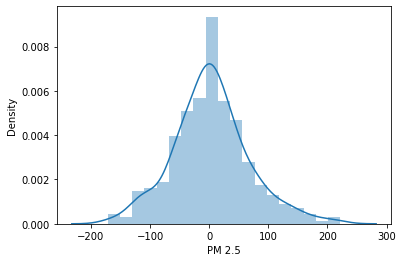

In [141]:
sns.distplot(y_test-xg_random_pred)

C:\Users\USER\.conda\envs\virtualenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PM 2.5'>

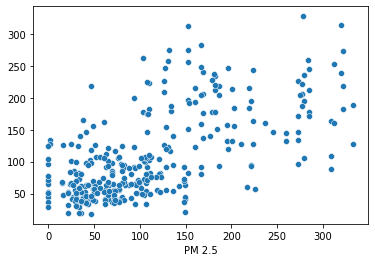

In [142]:
sns.scatterplot(y_test,xg_random_pred)

MAE: 48.11264230388169
MSE: 4176.00702771352
RMSE: 64.62203206115944


#### KNN Regressor

In [145]:
from sklearn.neighbors import KNeighborsRegressor

In [164]:
knn_regressor = KNeighborsRegressor(n_neighbors=3)

In [165]:
knn_regressor.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [166]:
knn_pred= knn_regressor.predict(X_test)

In [167]:
knn_regressor.score(X_train,y_train)

0.6982566102921303

In [168]:
knn_regressor.score(X_test,y_test)

0.3560622501006834

In [169]:
knn_cv_score = cross_val_score(knn_regressor,X,y,cv = 5)

In [170]:
knn_cv_score.mean()

0.2744414024998075

C:\Users\USER\.conda\envs\virtualenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

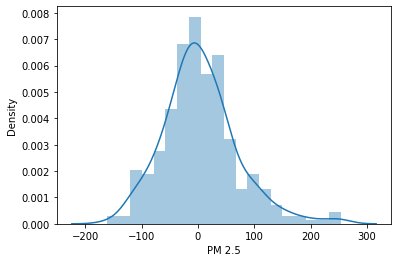

In [171]:
sns.distplot(y_test-knn_pred)

C:\Users\USER\.conda\envs\virtualenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PM 2.5'>

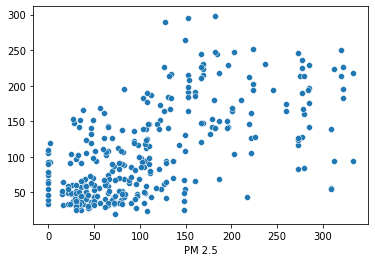

In [172]:
sns.scatterplot(y_test,knn_pred)

In [173]:
# Hyperparameter Tuning

accuracy_score = []

for i in range(0,40):
    knn = KNeighborsRegressor(n_neighbors=i)
    score = cross_val_score(knn,X,y,cv=5, scoring = 'neg_mean_squared_error')
    accuracy_score.append(score.mean())

C:\Users\USER\.conda\envs\virtualenv\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USER\.conda\envs\virtualenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    Will return a dict of floats if `scorer` is a dict, otherwise a single
  File "C:\Users\USER\.conda\envs\virtualenv\lib\site-packages\sklearn\neighbors\_regression.py", line 190, in fit
    for j in range(_y.shape[1]):
  File "C:\Users\USER\.conda\envs\virtualenv\lib\site-packages\sklearn\neighbors\_base.py", line 514, in _fit
    dist : array of shape (n_samples_chunk, n_neighbors), optional
ValueError: Expected n_neighbors > 0. Got 0

  # e.g. unwrap memmapped scalars
C:\Users\USER\.conda\envs\virtualenv\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimato

Text(0, 0.5, 'Accuracy Rate')

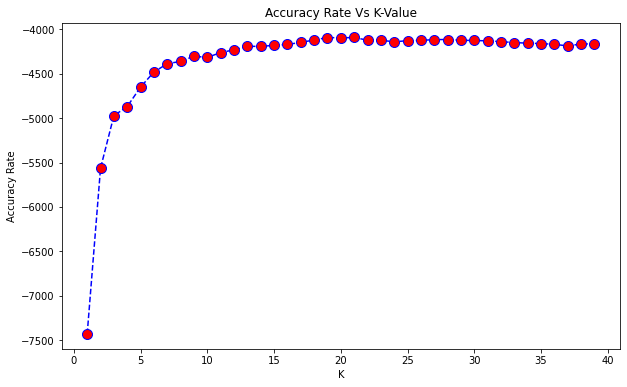

In [174]:
plt.figure(figsize=(10,6))
plt.plot(range(0,40), accuracy_score, color= 'blue', linestyle = 'dashed', marker = 'o', markerfacecolor = 'red',
         markersize = '10')
plt.title('Accuracy Rate Vs K-Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

In [176]:
print('MAE:', mean_absolute_error(y_test, knn_pred))
print('MSE:', mean_squared_error(y_test, knn_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, knn_pred)))

MAE: 49.39530715005036
MSE: 4406.3349691842905
RMSE: 66.3802302585965


#### ANN

In [180]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,LeakyReLU,PReLU,ELU

In [182]:
ann_model = Sequential()
ann_model.add(Dense(128,kernel_initializer = 'normal', input_dim = X_train.shape[1], activation = 'relu'))

ann_model.add(Dense(256,kernel_initializer = 'normal', activation = 'relu'))
ann_model.add(Dense(256,kernel_initializer = 'normal', activation = 'relu'))
ann_model.add(Dense(256,kernel_initializer = 'normal', activation = 'relu'))

ann_model.add(Dense(1,kernel_initializer = 'normal', activation = 'linear'))

ann_model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics=['mean_absolute_error'])
ann_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               1024      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 165,889
Trainable params: 165,889
Non-trainable params: 0
_________________________________________________________________


In [185]:
model_history = ann_model.fit(X_train,y_train,validation_split=0.33, batch_size = 5, epochs = 50)

Epoch 1/50
104/104 [==============================] - 26s 12ms/step - loss: 9620.6684 - mean_absolute_error: 75.8369 - val_loss: 7470.0620 - val_mean_absolute_error: 65.7186
Epoch 2/50
104/104 [==============================] - 0s 3ms/step - loss: 8467.4171 - mean_absolute_error: 72.9285 - val_loss: 7702.5039 - val_mean_absolute_error: 63.4715
Epoch 3/50
104/104 [==============================] - 0s 5ms/step - loss: 7364.4443 - mean_absolute_error: 65.7318 - val_loss: 6672.4570 - val_mean_absolute_error: 62.2632
Epoch 4/50
104/104 [==============================] - 0s 4ms/step - loss: 6261.6870 - mean_absolute_error: 59.4119 - val_loss: 6644.0903 - val_mean_absolute_error: 66.0307
Epoch 5/50
104/104 [==============================] - 0s 4ms/step - loss: 7123.5953 - mean_absolute_error: 63.7541 - val_loss: 6432.1895 - val_mean_absolute_error: 60.3345
Epoch 6/50
104/104 [==============================] - 0s 4ms/step - loss: 7099.1955 - mean_absolute_error: 62.5269 - val_loss: 6463.4463 -

104/104 [==============================] - 0s 4ms/step - loss: 5051.1570 - mean_absolute_error: 52.8183 - val_loss: 4773.2036 - val_mean_absolute_error: 52.6706
Epoch 49/50
104/104 [==============================] - 0s 3ms/step - loss: 5209.8936 - mean_absolute_error: 53.5859 - val_loss: 4646.6504 - val_mean_absolute_error: 49.7200
Epoch 50/50
104/104 [==============================] - 0s 3ms/step - loss: 4756.9260 - mean_absolute_error: 51.6617 - val_loss: 4893.8145 - val_mean_absolute_error: 49.9654


In [186]:
ann_pred = ann_model.predict(X_test)

C:\Users\USER\.conda\envs\virtualenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

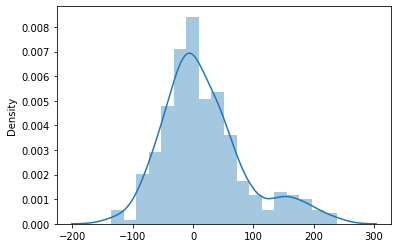

In [189]:
sns.distplot(y_test.values.reshape(-1,1)-ann_pred)

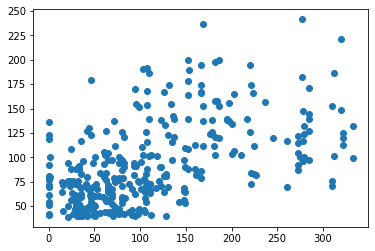

In [190]:
plt.scatter(y_test,ann_pred)

In [191]:
print('MAE:', mean_absolute_error(y_test, ann_pred))
print('MSE:', mean_squared_error(y_test, ann_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, ann_pred)))

MAE: 51.56049906382028
MSE: 5125.214323357503
RMSE: 71.59060219999203
